In [4]:
import re # using regular expression to find different seperators
from pyspark.sql.types import *
from pyspark.sql.functions import * # importing col

In [15]:
sample_geo ='s3://finalprojneil/sample_geo.txt'

In [16]:
# Loading sample geo data

sample_geo_log=sc.textFile(sample_geo)
header = sample_geo_log.first()

sample_geo_log = sample_geo_log.filter(lambda line: line != header)

temp_var1 = sample_geo_log.map(lambda k:k.split('\t'))
temp_var1 = temp_var1.filter(lambda line: line != [''])

sample_geo_log_df=temp_var1.toDF(header.split("\t"))

sample_geo_log_df = sample_geo_log_df.withColumn("Latitude", sample_geo_log_df["Latitude"].cast('double'))
sample_geo_log_df = sample_geo_log_df.withColumn("Longitude", sample_geo_log_df["Longitude"].cast('double'))

#caching df 
sample_geo_log_df.cache()
sample_geo_log_df.show(5)

+-----------+------------+----------+
|   Latitude|   Longitude|LocationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|         1|
|42.09013298|-87.68915558|         2|
|39.56341754|-75.58753204|         3|
|39.45302347|-87.69374084|         4|
| 38.9537989|-77.01656342|         5|
+-----------+------------+----------+
only showing top 5 rows



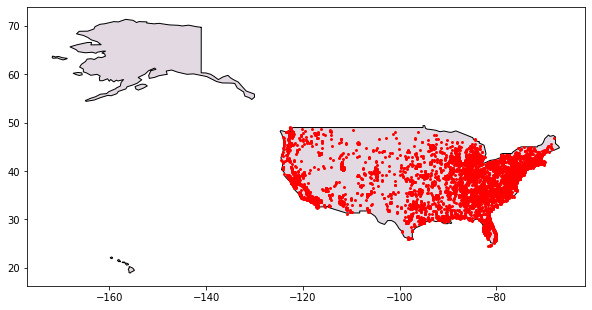

In [17]:
plot_data(sample_geo_log_df, a=0)
